In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "./data/PetImages"
CATEGORIES = ['Dog','Cat']

IMG_SIZE = 60

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

import random
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np

import pickle

X = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

X = X/255.0 - np.std(X)

In [ ]:
model = Sequential()

model.add(Conv2D((64), (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D((64), (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

model.fit(X, y, batch_size=16, epochs=8 ,validation_split=0.1)

In [ ]:
tf.keras.models.save_model(model=model, filepath='./CNN_1.model')

In [136]:
#test_img_path = './data/test/sobaken.jpeg'
test_imgs_path = './data/test/'
test_data = []

import cv2, os

for test_img_path in os.listdir(test_imgs_path):
    try:
        test_img = cv2.imread(os.path.join(test_imgs_path, test_img_path), cv2.IMREAD_GRAYSCALE)
        test_img_resized = cv2.resize(test_img, (IMG_SIZE, IMG_SIZE))        
        test_data.append(test_img_resized)
    except Exception as e:
        print(str(e) + 'This exception is thrown because of \'' + str(test_img_path) + '\' file' )

In [137]:
import tensorflow as tf
model = tf.keras.models.load_model(filepath='./ConvModel1.model')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [138]:
predicted_classes = []

from tensorflow.keras.preprocessing.image import img_to_array
for test_img in test_data:
    predicted_classes.append(model.predict_classes( np.expand_dims(img_to_array(test_img), axis=0) ))

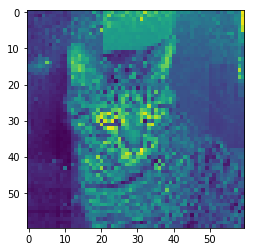

Cat


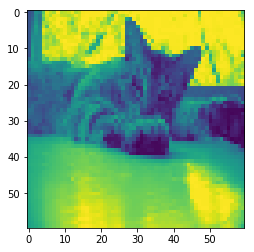

Cat


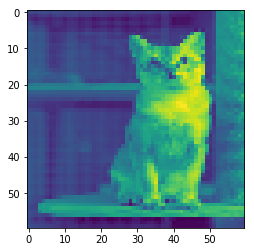

Cat


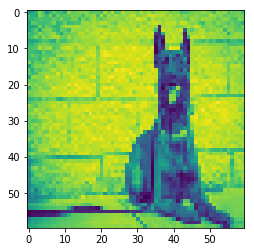

Dog


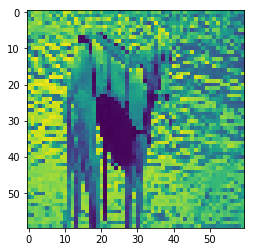

Dog


In [140]:
import matplotlib.pyplot as plt

for i in range(len(predicted_classes)):
    plt.imshow(test_data[i])
    plt.show()
    print(CATEGORIES[predicted_classes[i][0][0]])